Epoch 1/30
196/196 [==============================] - 28s 135ms/step - loss: 1.6789 - accuracy: 0.3757 - val_loss: 3.1255 - val_accuracy: 0.1064
Epoch 2/30
196/196 [==============================] - 26s 135ms/step - loss: 1.3761 - accuracy: 0.4972 - val_loss: 2.9341 - val_accuracy: 0.2116
Epoch 3/30
196/196 [==============================] - 26s 133ms/step - loss: 1.2253 - accuracy: 0.5590 - val_loss: 1.6681 - val_accuracy: 0.4606
Epoch 4/30
196/196 [==============================] - 27s 140ms/step - loss: 1.1254 - accuracy: 0.5951 - val_loss: 1.2531 - val_accuracy: 0.5806
Epoch 5/30
196/196 [==============================] - 26s 133ms/step - loss: 1.0537 - accuracy: 0.6217 - val_loss: 1.0060 - val_accuracy: 0.6440
Epoch 6/30
196/196 [==============================] - 26s 135ms/step - loss: 0.9889 - accuracy: 0.6449 - val_loss: 1.3021 - val_accuracy: 0.5677
Epoch 7/30
196/196 [==============================] - 26s 134ms/step - loss: 0.9431 - accuracy: 0.6652 - val_loss: 1.0916 - val_ac

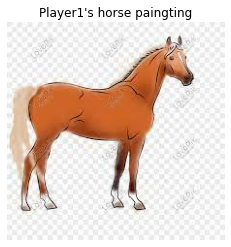

Player1 painting is predicted successfully
Player1 painting is about 43% most similar to horse


1/1 [==============================] - 0s 18ms/step


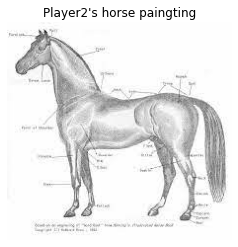

Player2 painting is predicted successfully
Player2 painting is about 53% most similar to horse


Player2 Win!
Player2 is 10.0 points better than Player1


In [11]:
#신경망모델 관련 및 필요 라이브러리 불러오기
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#cifar10 datasets 로드
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
#One-hot encode
train_labels, test_labels = utils.to_categorical(train_labels,10), utils.to_categorical(test_labels,10)
#데이터 전처리
train_images, test_images = train_images/255, test_images/255

#ImageDataGenerator를 통한 데이터 증강
image_gen=ImageDataGenerator(  
    width_shift_range=0.3,
    height_shift_range=0.3,
    vertical_flip=True
)
train_gen=image_gen.flow(train_images, train_labels, batch_size=256)

#CNN 모델 설정
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

#compile 설정
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#model 학습 
history=model.fit(
    train_gen,
    validation_data=(test_images,test_labels),
    batch_size=32,
    epochs=30,
    validation_split=0.1
)

#성능 분석을 보고자 하면 주석처리 해제 필요
"""
#accuracy와 val_accuray 비교 그래프 
plt.plot(history.history['accuracy'],'b', label='accuracy')
plt.plot(history.history['val_accuracy'],'r', label = 'val_accuracy')
plt.title('Accuracy Trend')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()
#loss와 val_loss 비교 그래프
plt.plot(history.history['loss'],'b', label='loss')
plt.plot(history.history['val_loss'],'r', label = 'val_loss')
plt.title('Loss Trend')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()
#학습한 모델의 성능 출력
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Test Accuracy : ',test_acc)
"""

#업로드한 그림 이미지 전처리하기 
def image_format(path):
  img=tf.io.read_file(path)
  img=tf.image.decode_jpeg(img, channels=3)
  convert_img=tf.image.convert_image_dtype(img,tf.float32)
  convert_img=tf.image.resize(convert_img,[32,32])
  return img,convert_img
#업로드한 그림 이미지를 학습된 모델로 예측 및 게임 플레이어 점수 측정
def painting_predict_get_point(player):
    img,convert_img=image_format(player[2])
    pred=model.predict(np.array([convert_img]))
    pred_idx1=np.argmax(pred)
    pred_idx2=label.index(player[1])
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'{player[0]}\'s {label[pred_idx2]} paingting')
    plt.show()
    if player[1]==label[pred_idx1]: #플레이어가 그리고자하는 그림과 모델이 예측한 결과가 같을때
      print(f'{player[0]} painting is predicted successfully')
      print(f'{player[0]} painting is about {pred[0][pred_idx1]*100:.0f}% most similar to {label[pred_idx1]}')
      print('\n')
      point=round(pred[0][pred_idx1]*100,0) #플레이어가 그리고자하는 그림과 실사와의 유사율을 추가 점수로 부여
      point+=50  #기본점수 50점 부여
    else: #플레이어가 그리고자하는 그림과 모델이 예측한 결과가 다를때
      print(f'{player[0]}\'s painting failed to predicted ')
      print(f'{player[0]} painting is about {pred[0][pred_idx1]*100:.0f}% most similar to {label[pred_idx1]}')
      print(f'{player[0]} painting is about {pred[0][pred_idx2]*100:.0f}% similar to {label[pred_idx2]}')
      print('\n')
      point=round(pred[0][pred_idx2]*100,0) #플레이어가 그리고자하는 그림과 실사와의 유사율을 점수로 부여
    return point

label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print('Choose one from [ airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck ]')
print('Enter only lower case letters')
p1=input('What is the painting drawn by player1? : ')
p1_path='/content/color_horse.jpeg' #플레이어1이 그린 그림 이미지의 저장경로
while True:
  if p1 in label:
    break
  p1=input('Check your input and enter it correctly again : ')
player1=['Player1',p1,p1_path]

p2=input('What is the painting drawn by player2? : ')
p2_path='/content/horse.jpeg' #플레이어2가 그린 그림 이미지의 저장경로
while True:
  if p2 in label:
    break
  p2=input('Check your input and enter it correctly again : ')
player2=['Player2',p2,p2_path]

point1=painting_predict_get_point(player1)
point2=painting_predict_get_point(player2)

#플레이어들의 점수를 비교하여 승패 결정
if point1>point2:
  print('Player1 Win!')
  print(f'Player1 is {point1-point2} points better than Player2')
elif point2>point1:
  print('Player2 Win!')
  print(f'Player2 is {point2-point1} points better than Player1')
else:
  print('Player1 and Player2 Draw')